# 668. Kth Smallest Number in Multiplication Table

### Difficulty: <font color = red> Hard </font>
---
Nearly everyone has used the **Multiplication Table**. The multiplication table of size `m x n` is an integer matrix `mat` where `mat[i][j] == i * j` (**1-indexed**).

Given three integers `m`, `n`, and `k`, return the `kth` smallest element in the `m x n` multiplication table.
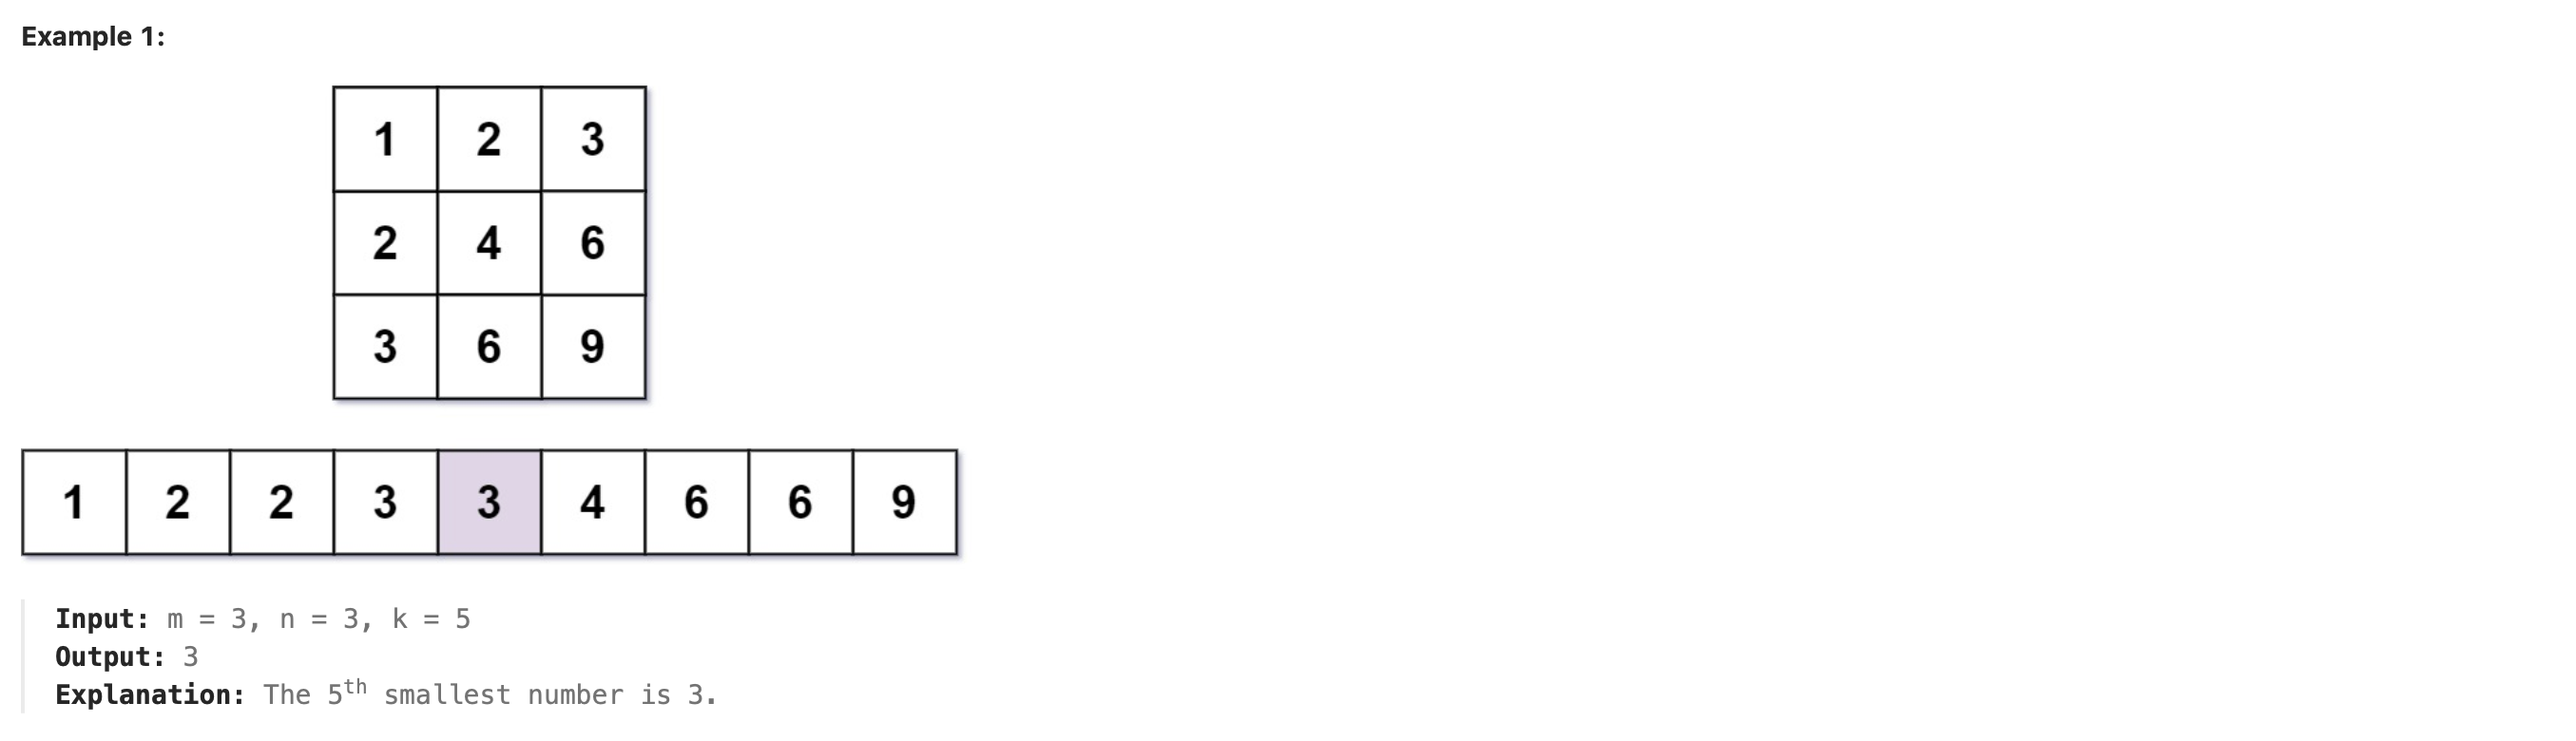

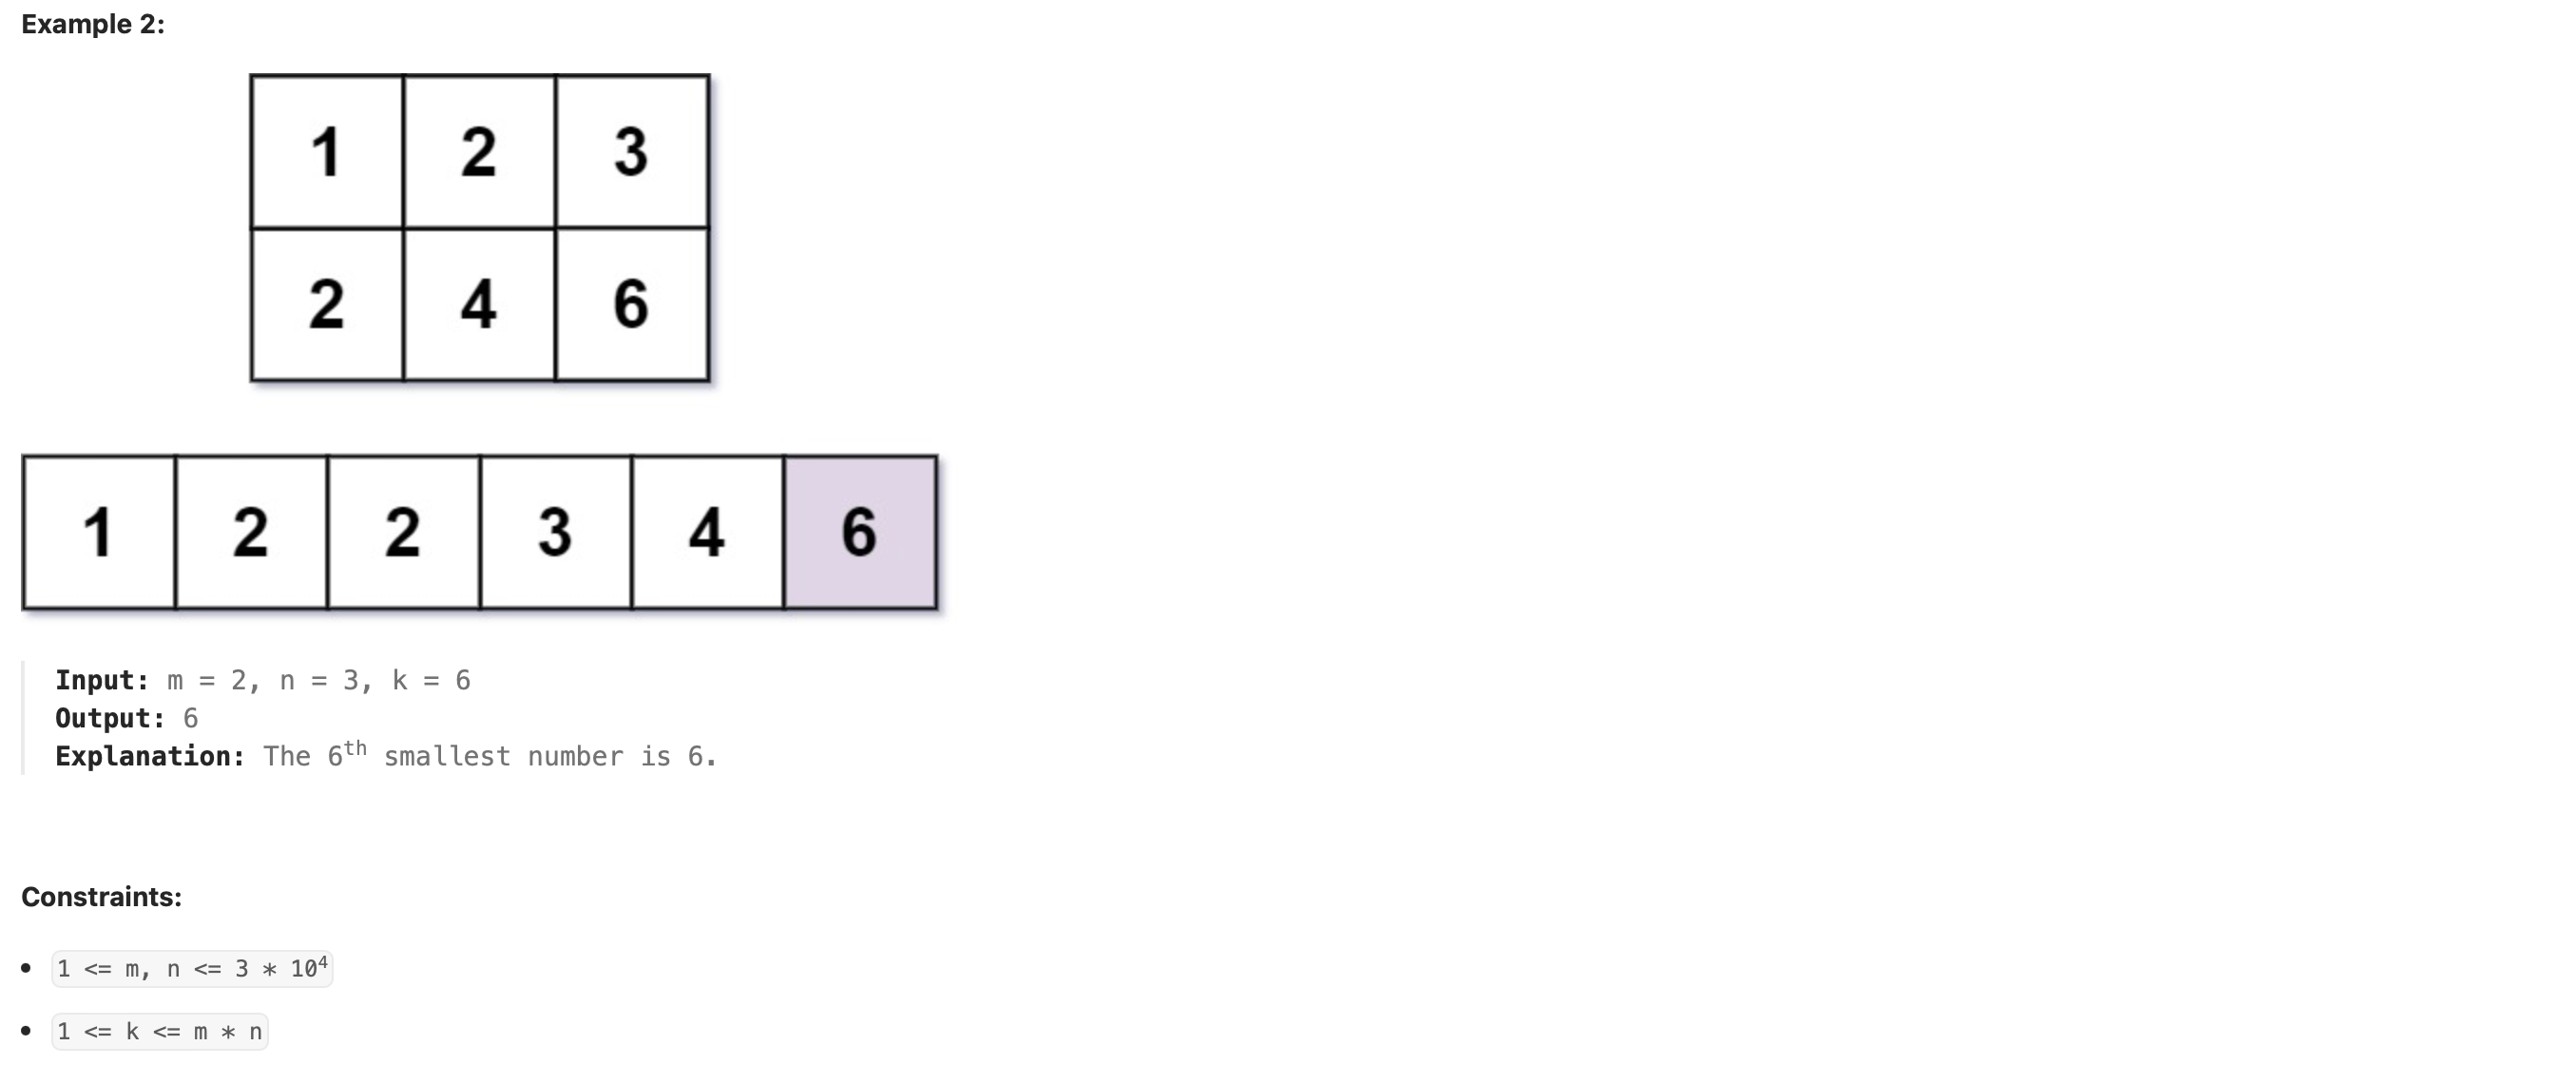

## Approach overview:

Define the possible range of values for an element in `mat`. Using binary search, pick an element from the range and count the number of elements $<=$ that element. If the count is $>= k$, narrow the search to find a smaller element until the `k-th` smallest element is found. 

Note: the `k-th` smallest element is the element with a count that is exactly `k`. 

## Detailed Explanation:

#### Defining the possible range of values for integer element.

Lower bound (smallest possible element in matrix) = `1`

Upper bound (largest possible element in matrix) = `m x n`

We pick an element (the middle value) from the range and count the number elements in matrix <= `element`. 

- If the count >= 6, we then narrow search range to find a smaller element (until we pick / find the `k-th` smallest element in matrix).

- Else, we narrow search range to find a larger element.

#### Dry run example 

Input: `m = 3`, `n = 3` & `k = 5`.

---

`left (lower bound) = 1`, `right (upper bound) = 3 x 3 = 9` and `mid = 5`

For `mid = 5`:

---
*After 1st pass:*

The first element in 1st row is `1` and the number of elements in current row `<= 5 (mid)` is `count = min( 5 // 1 = 5, n = 3) = 3`. 

`count = 3`

*After 2nd pass:*

The first element in 2nd row is `2` and the number of elements in current row `<= 5 (mid)` is `count = min( 5 // 2 = 2, n = 3) = 2`. 

`count = 3 + 2 = 5`

*After 3rd pass:*

The first element in 3rd row is `3` and the number of elements in current row `<= 5 (mid)` is `count = min( 5 // 3 = 1, n = 3) = 1`. 

`count = 3 + 2 + 1 = 6`

           :


`count = 6 >= k (5)`

so `return True`

---

`left (lower bound) = 1`, `right (upper bound) = 5 (previous mid)` and `mid = 3`

For `mid = 3`

---

*After 1st pass:*

The first element in 1st row is `1` and the number of elements in current row `<= 3 (mid)` is `count = min( 3 // 1 = 3, n = 3) = 3`. 

`count = 3`

*After 2nd pass:*

The first element in 2nd row is `2` and the number of elements in current row `<= 3 (mid)` is `count = min( 3 // 2 = 2, n = 3) = 1`. 

`count = 3 + 1 = 4`

*After 3rd pass:*

The first element in 3rd row is `3` and the number of elements in current row `<= 3 (mid)` is `count = min( 3 // 3 = 1, n = 3) = 1`. 

`count = 3 + 1 + 1 = 5`

           :
  

`count = 5 >= k (5)`

so `return True`

      :
      :

---
`left (lower bound) = 1`, `right (upper bound) = 3 (previous mid)` and `mid = 2`

For `mid = 2`

---

*After 1st pass:*

The first element in 1st row is `1` and the number of elements in current row `<= 2 (mid)` is `count = min( 2 // 1 = 3, n = 3) = 2`. 

`count = 2`

*After 2nd pass:*

The first element in 2nd row is `2` and the number of elements in current row `<= 2 (mid)` is `count = min( 2 // 2 = 2, n = 3) = 1`. 

`count = 2 + 1 = 3`

*After 3rd pass:*

The first element in 3rd row is `3` and the number of elements in current row `<= 2 (mid)` is `count = min( 2 // 3 = 1, n = 3) = 0`. 

`count = 2 + 1 + 0 = 3`

           :
  

`count = 3 >= k (5)`

so `return False`

      :
      :

`left (lower bound) = 2 (mid) + 1 = 3`, `right (upper bound) = 3` 

`left = right = 3` *(pointers have met so terminate binary search because we've found smallest k-th number)*

`return left (3)`

## Key Challenges:



In [ ]:
class Solution:
    def findKthNumber(self, m: int, n: int, k: int) -> int:

        def count(number):

            # variable to keep count of all integers in `mat` <= `number`
            count = 0
            
            # loop through all the rows in `mat`
            for element in range(1, m + 1):
                # calculate the count of integers <= `number` in current row 
                count += min(number // element, n)
            
            # return the count of integers in `mat` that's smaller than or equal to `number` 
            return count >= k     
        
        # initialize lower bound (smallest element in `mat`)
        left = 1 
        # initialize upper bound (largest element in 'mat')
        right = m * n
        
        # loop until left and right pointer meets
        while left < right:
            # calculate the middle value in current range 
            mid = left + (right - left) // 2
        
            # check if `mid` value is valid 
            if count(mid) == True:
                # narrow search range to find a smaller `element` (until we find the kth smallest element)
                right = mid

            # otherwise `mid` value is not valid
            else:
                # narrow search range to find a larger `element` 
                # because all elements smaller than current element (mid) is invalid
                left = mid + 1

        # return the kth smallest element in `mat` (m x n multiplication table)
        return left          